# AnomaData (Automated Anomaly Detection for Predictive Maintenance)

Problem Statement:

Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.

Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.

Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.

This project is aimed at predicting the machine breakdown by identifying the anomalies in the data.

The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. 

The rest of the columns are predictors.  


## Data Description:

1. Time : This column marks the timestamp as to when , data for that row was recorded. In this dataset the period between each observation is 2 seconds.

2. Columns x1 to x60 : All of these columns are predictors determining the presense of anomalies. We unfortunately do not have access to the information about the nature of each independant column. These columns are numeric in nature.

3. Column y.1 : This column is also a predictor. Once again we unfortunately do not have access to the information about the nature of this column. This column is binary in nature.

4. Column y : Represents our output variable which we aim to accurately predict. It represents the presence of anomalies at that point in time.

#### Importing Base Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [2]:
# Reading Our dataset
df = pd.read_excel("C:\\Users\\firza\\Downloads\\AnomaData.xlsx")

In [3]:
df.head(3)

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0


### Basic Initial Overview Of The Data

In [4]:
print("Our Dataset has {:3} columns ".format(len(df.columns)))

print("Our Dataset has {:3} rows ".format(len(df)))

Our Dataset has  62 columns 
Our Dataset has 18398 rows 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [6]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


#### We need to check if our output variable depends on the datetime column time. If so our data becomes a time series.

In [7]:

# Convert datetime 'time' column to timestamps (numeric representation)
df['time2'] = df['time'].astype('int64') // 10**9  

# Now calculate the Pearson correlation coefficient
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['time2'], df['y'])
print(f'Pearson Correlation: {round(correlation,3)}, p-value: {round(p_value,3)}')

# Drop the temporary 'time_numeric' column if not needed
df.drop('time2', axis=1, inplace=True)



Pearson Correlation: 0.001, p-value: 0.92


1.As seen above the correlation between the time column and our output variable is marginally above 0. This implies that there is so relationship between the two.

H0 : Correlation is equal to 0

H1 : Correlation is not equal to 0

2.The p-value associated with the correlation coefficient tests the null hypothesis that there is no correlation between the two variables against the alternative hypothesis that there is some correlation. We lack evidence of any kind to reject the null hypothesis.

Conclusion : These 2 statistics strongly imply that there is no relation between time and the occurance of anomalies

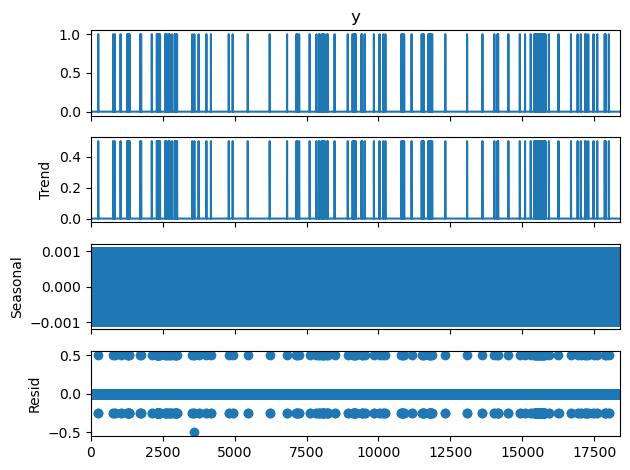

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'time' is the datetime column and 'y' is the binary output variable column in your DataFrame
decomposition = seasonal_decompose(df['y'], model='additive', period=2)  # Set period=2 for 2-minute intervals
decomposition.plot()
plt.show()



Based on the seasonal decomposition analysis and the characteristics of the trend, seasonal, and residual components:

1.The binary output variable 'y' does not exhibit a meaningful long-term trend or significant seasonality at 2-minute intervals.

2.The data appears stable, with random fluctuations around a constant level, and any remaining variability is random noise rather than systematic patterns.

3.Therefore, you can infer that the time column does not have a significant impact or predictive value for the binary output variable 'y.

##### All of these evidences lead us to conclude that our dataset is not a time series but rather a cross sectional dataset. 

##### We will hence omit the time column from our analysis

In [9]:
df.drop('time',axis=1,inplace=True)

# Exploratory Data Analysis 

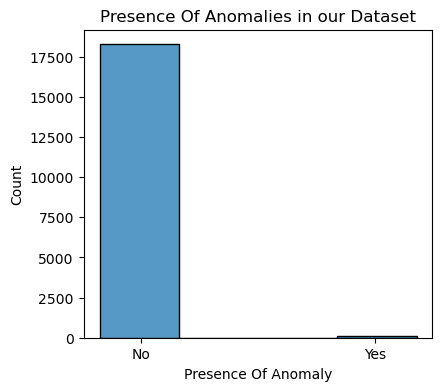

In [10]:
plt.figure(figsize=(4.5, 4))
plt.xticks([0.13, 0.87], ["No", "Yes"])
sns.histplot(data=df, x="y", bins=4)
plt.xlabel("Presence Of Anomaly")
plt.title("Presence Of Anomalies in our Dataset")
plt.show()


##### It is clear we have a drastic class imbalance.

##### To rectify this we implement SMOTE on the minority class. This will be done later on.

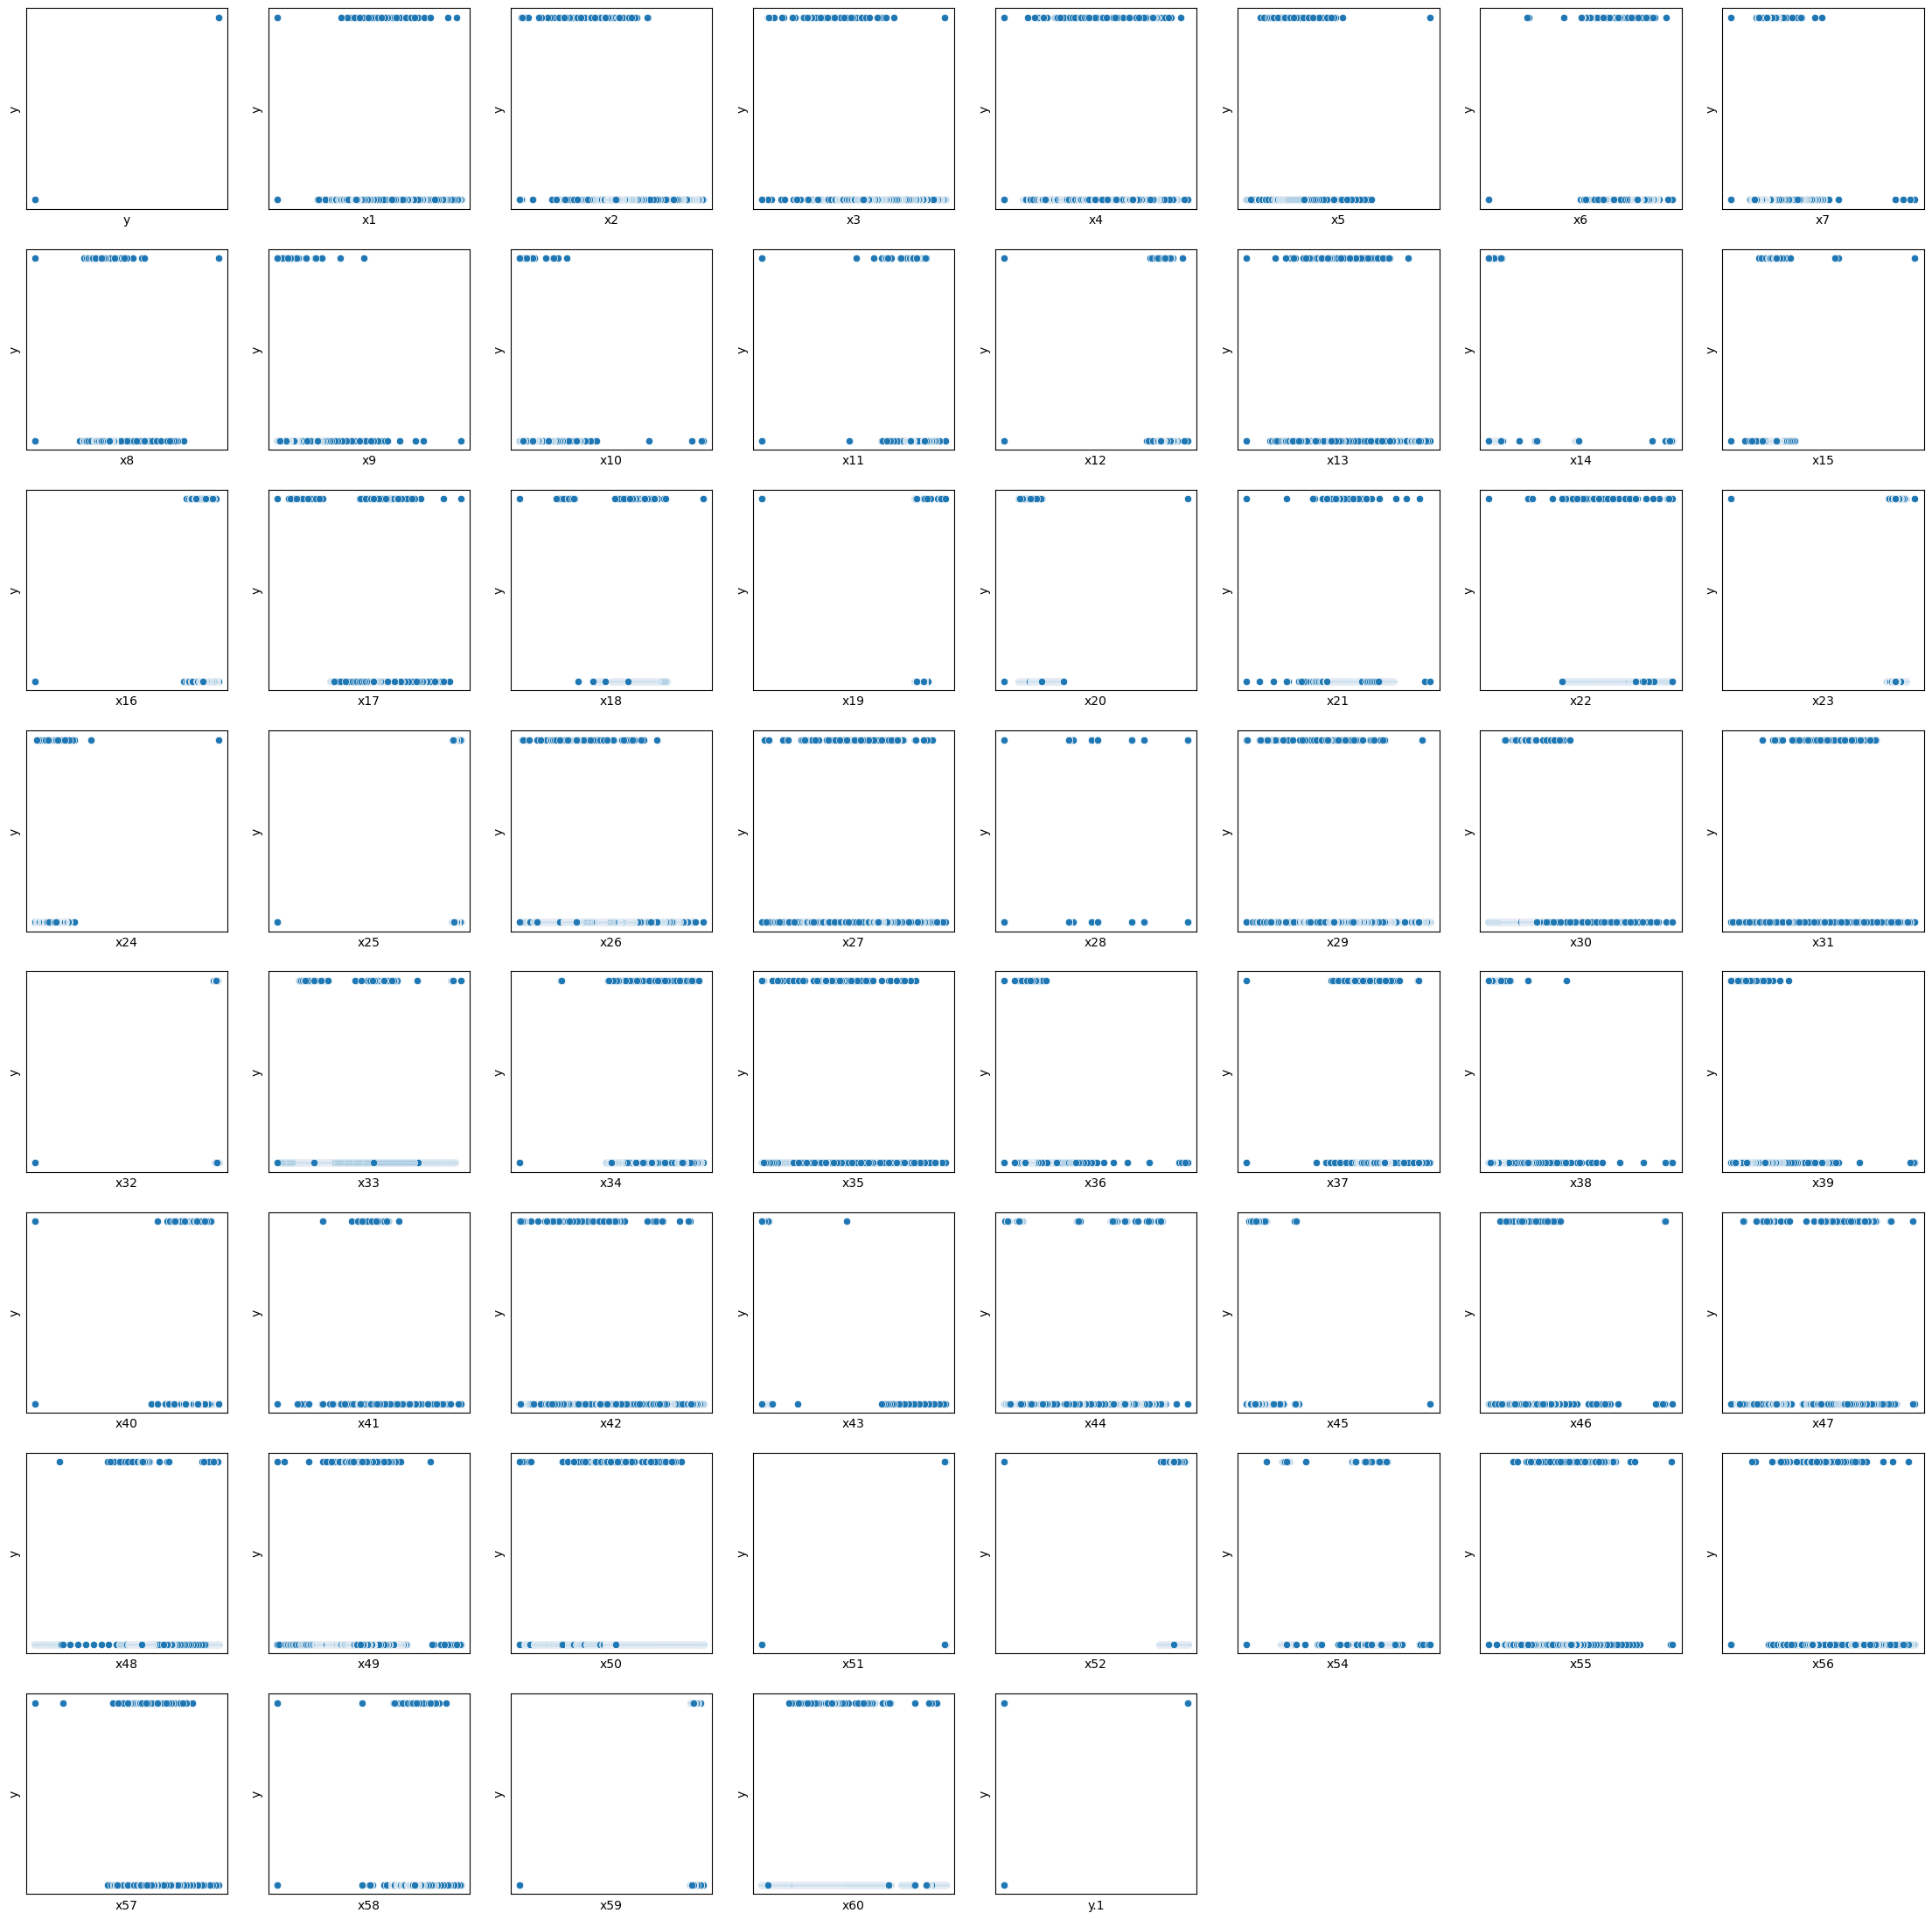

In [11]:
plt.figure(figsize=(28,28))
for i,j in enumerate(df):
    plt.subplot(8,8,i+1)
    sns.scatterplot(data=df,x=j,y="y")
# We have removed the ticks to make the view look neater
    plt.xticks([]) 
    plt.yticks([])
plt.show()

##### The above view shows us the relationship between all of our features with the output variable Y

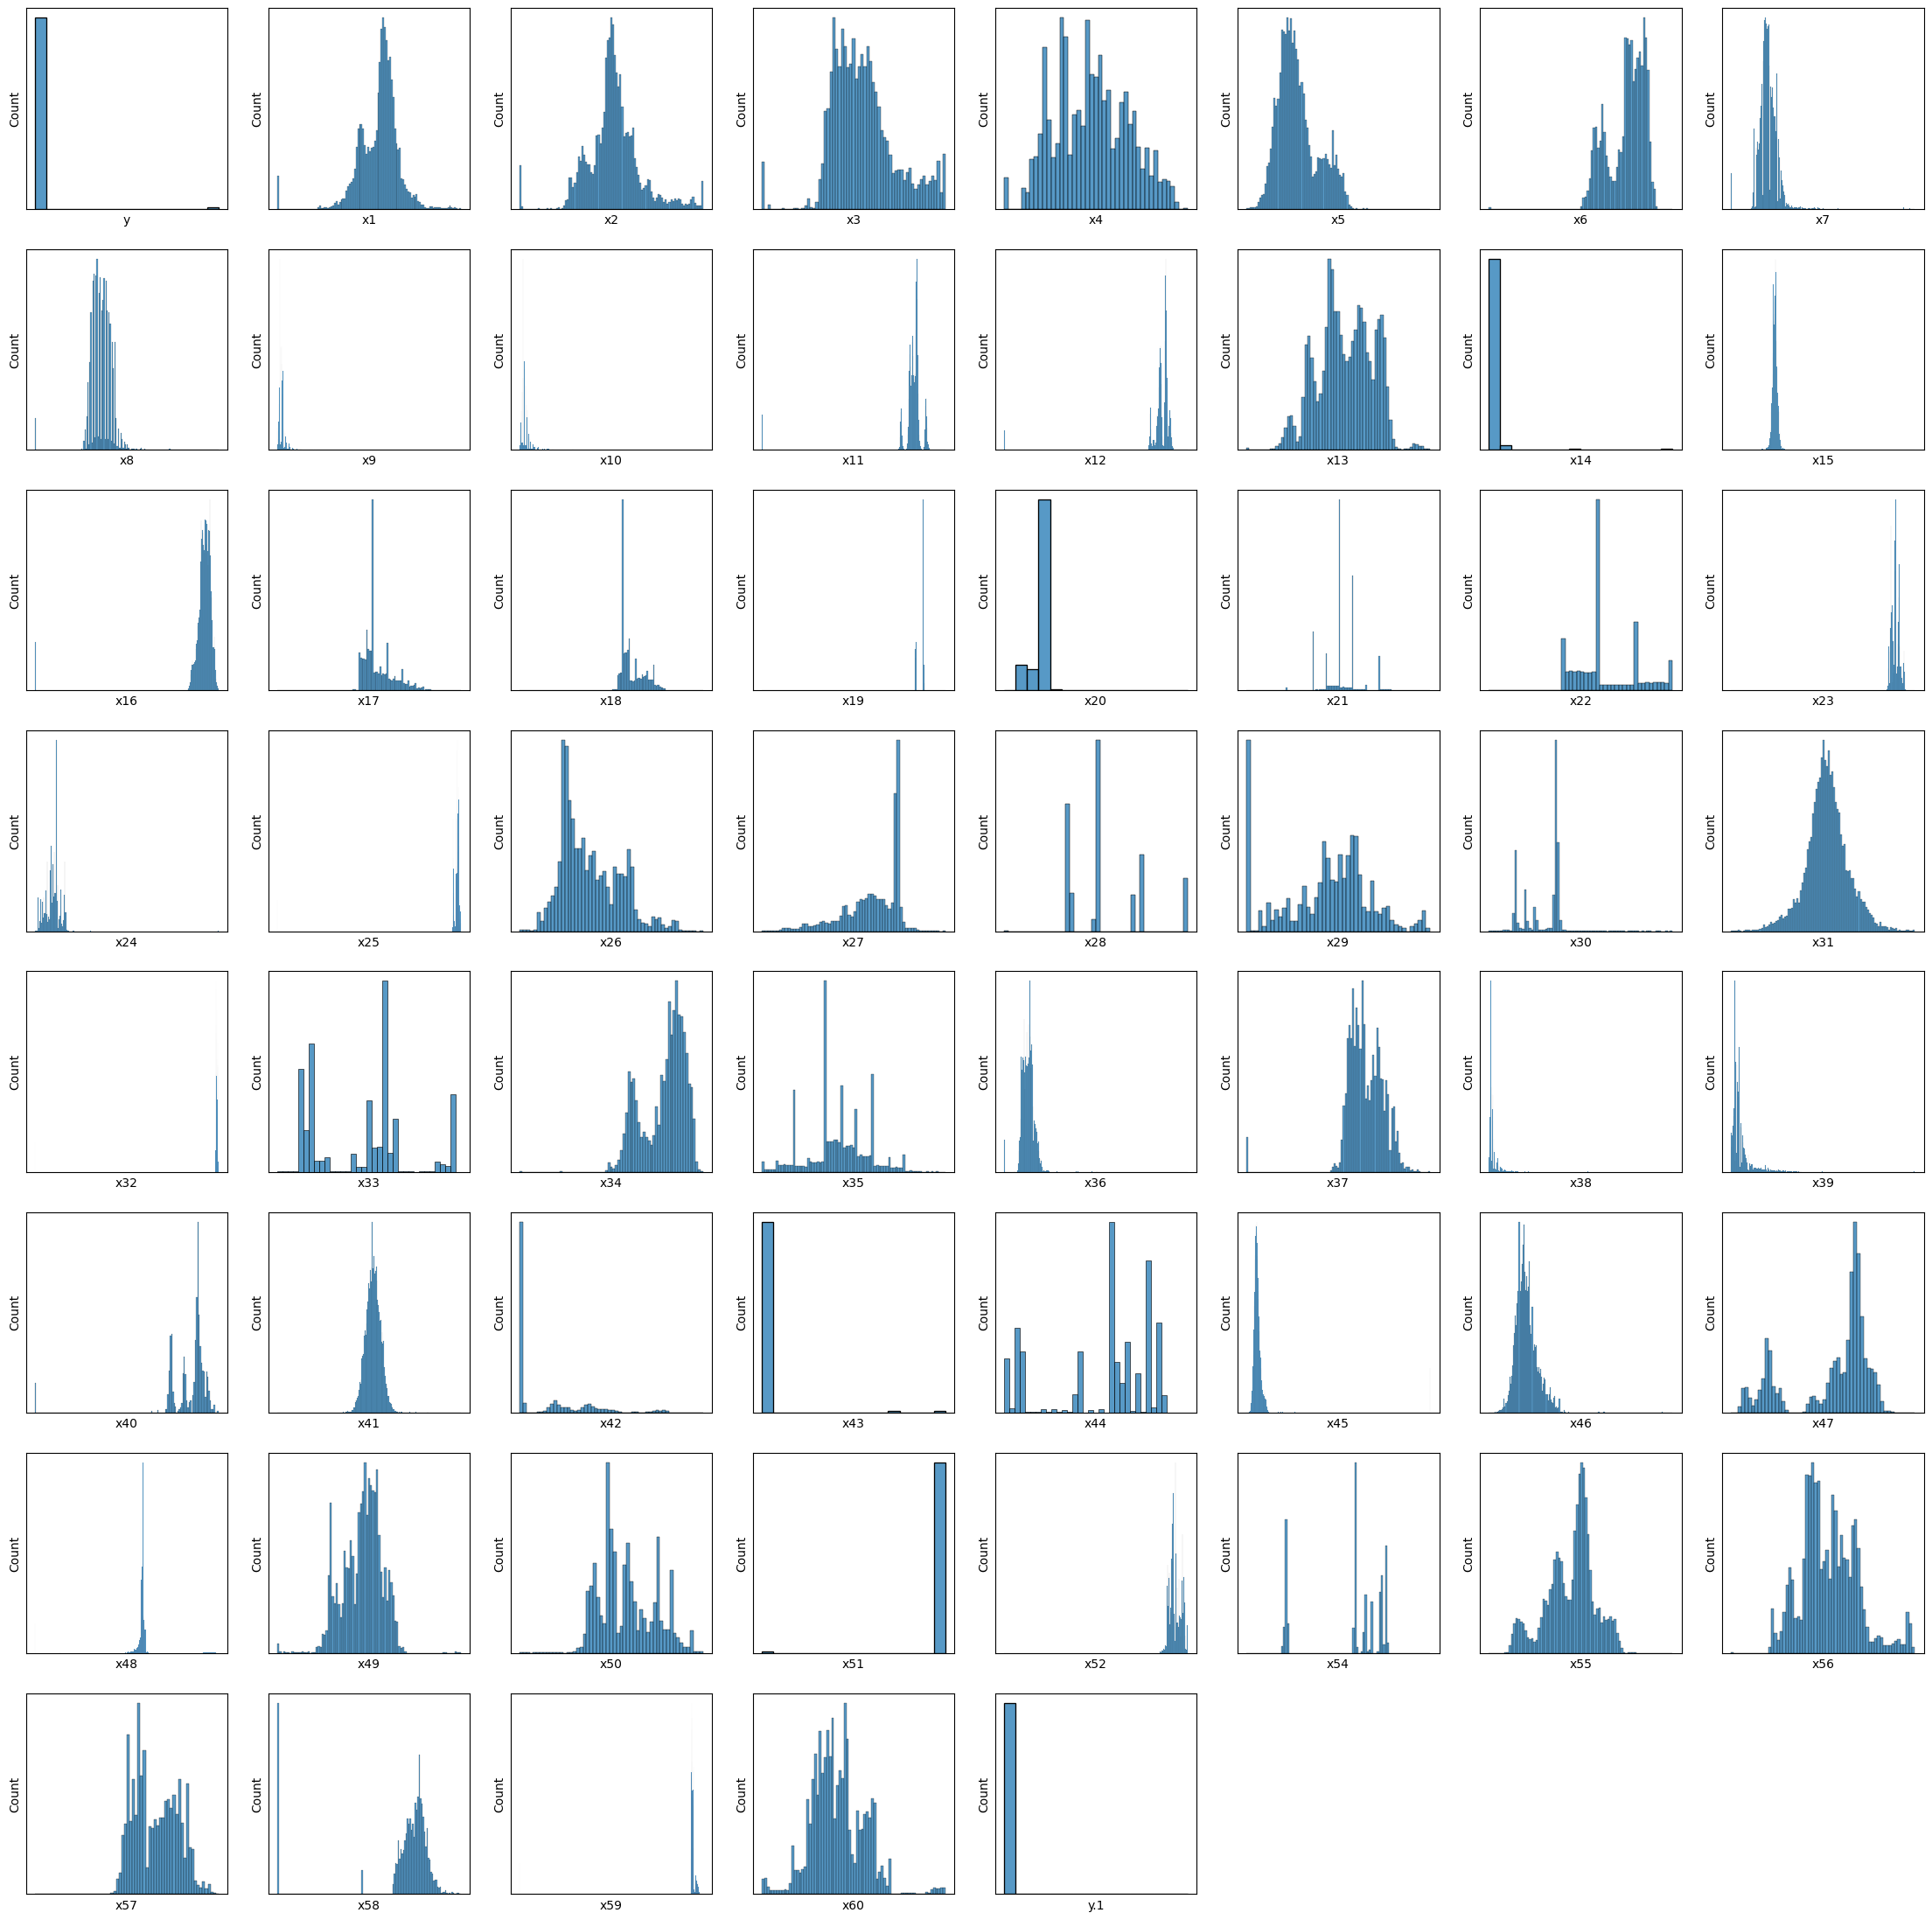

In [12]:
plt.figure(figsize=(28,28))
for i,j in enumerate(df):
    plt.subplot(8,8,i+1)
    sns.histplot(data=df,x=j)
# We have removed the ticks to make the view look neater
    plt.xticks([]) 
    plt.yticks([])
plt.show()

##### The above view helps us understand the distribution of our features. 

##### We can see that several of these features roughly follow a normal distribution but a few are highly skewed. 

##### We need to apply power transforms to treat this.

### Data Pre-Processing

In [13]:
# Checking for missing values
df.isna().sum().sum()

0

We have no missing values in our data

In [14]:
# Checking for duplicated values
df.duplicated().sum()

0

We have no duplicated values in our data

### Outlier Treatment

Due to the nature of the dataset (60 predictors without knowing the exact implication of each) , it becomes difficult to reasonably remove outliers without removing vast portions of our dataset. 

For this reason I have not applied outlier treatment.

To combat this we will implement models which are insensitive to the presence of outliers when we reach the model building stage.

##### Checking for high skewness and treating relevant columns with Yeo Johnson Power Transforms

In [15]:
Skewness = []
for i in df:
    Skewness.append(df[i].skew())

In [16]:
High_Skew = []
for i,j in zip(df,Skewness):
    if abs(j)>0.75:
        High_Skew.append(i)

In [17]:
remove = ['y','y.1']
for i in remove:
    High_Skew.remove(i)

In [18]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
new_col_val = transformer.fit_transform(df[High_Skew])

In [19]:
df[High_Skew] = new_col_val

##### We have successfully applied the power transform on our dataset.

##### Now we will apply Standard Scaler on our numeric Columns.

In [20]:
#The below code automatically splits our data into binary,numeric and categorical data.
numeric=[]
categorical=[]
binary = []
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float64":
        numeric.append(i)
    else:
        categorical.append(i)

v=[0,1]
for i in numeric:
    if list(set(df[i].values))==v:
        binary.append(i)
        numeric.remove(i)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric]=scaler.fit_transform(df[numeric])

##### Creation Of Feature Matrix and Dependant variables



In [22]:
X = df.drop('y',axis=1)
y = df.iloc[:,0]

#### Splitting our data into train and test splits for model building.

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

### Dealing with class imbalance 

We are dealing with a highly imbalanced class where the majority of values in our output variable "y"[presence of anomaly] are labeled as 'no', while a very small proportion is labeled as 'yes'.

To address this imbalance, we will implement Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class.

This approach involves generating synthetic samples for the 'yes' class to balance it with the 'no' class.

By doing so, we aim to improve the model's ability to learn from the minority class and make more accurate predictions.

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5,random_state=50)
x_train2,y_train2=smote.fit_resample(x_train,y_train)

In [25]:
y_train2.value_counts()

0    14619
1    14619
Name: y, dtype: int64

##### The class imbalance has been rectified as seen above.

#### As Discussed earlier since we were not able to sensibly deal with outliers we will pick Machine Learning Models that are insensitive to the outliers. We will use :

### 1 Decision Tree.
###  2 Random Forest.
###  3 Net Elastic - Logistic Regression.

##### Decision Tree and Random Forest Models are picked due to their robustness with dealing with outliers.
###### Random Forest Might Improve upon the Decision Tree Due to its lower risk of overfitting when the number of predictors are high(60 in this case)
###### Logistic Regression Can be used as a good comparison to the Tree Based Models.
###### For logistic regression we have picked Net Elastic because it is very likely regularization is required due to the excess number of predictors.

In [26]:
# Importing Base Libraries for evaluation 
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
f1_score, confusion_matrix, roc_curve, auc, roc_auc_score)

#### In this project, our primary focus is on the performance metric of recall.

#### This emphasis is crucial because in anomaly detection, our primary objective is to minimize the instances where anomalies are incorrectly classified as non-anomalies.

#### It is acceptable if the model mistakenly identifies non-anomalies as anomalies, but the opposite scenario should be avoided as much as possible.

#### Therefore, maximizing recall ensures that we capture as many anomalies as possible, reducing the risk of critical anomalies going undetected.

### Model 1 - Net Elastic  Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [27]:
#Run1
gs = GridSearchCV(LogisticRegression(penalty='elasticnet',
                                    solver='saga'),
                 dict(C=[0.1,1,100,1000],
                     l1_ratio=[0,0.2,0.4,0.6,0.8,1]),
                  scoring='recall',
                 cv = 5)

In [29]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'C': 1000, 'l1_ratio': 0.2}

In [28]:
#Run2
gs = GridSearchCV(LogisticRegression(penalty='elasticnet',
                                    solver='saga'),
                 dict(C=[1000],
                     l1_ratio=[0.1,0.2,0.3]),
                  scoring='recall',
                 cv = 5)

In [29]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'C': 1000, 'l1_ratio': 0.2}

In [30]:
model1 = gs.best_estimator_
model1.fit(x_train2 , y_train2)  
y_pred1 = model1.predict(x_test)


##### Metrics

In [31]:
acc_score1 = accuracy_score(y_test,y_pred1)
precision_score1 = precision_score(y_test,y_pred1)
recall_score1 = recall_score(y_test,y_pred1)
f1_score1 = f1_score(y_test,y_pred1)
confusion_matrix1 = confusion_matrix(y_test,y_pred1)

#### Building Evaluation Matrix

In [32]:

Eval_Matrix = pd.DataFrame({
    'acc': [acc_score1],
    'precision': [precision_score1],
    'recall': [recall_score1],
    'f1': [f1_score1]
})


In [33]:
Eval_Matrix

,acc,precision,recall,f1
0,0.903533,0.041667,0.6,0.077922


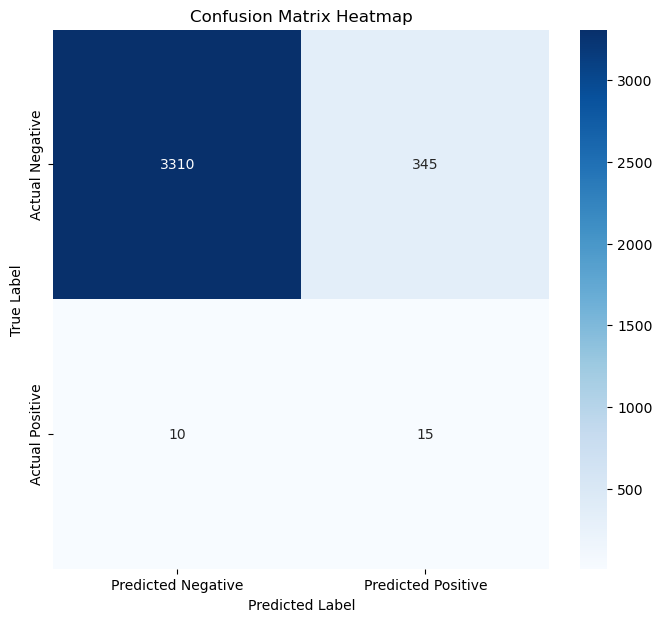

In [34]:
conf_df = pd.DataFrame(confusion_matrix1, index=['Actual Negative', 'Actual Positive'],
                       columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 7))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

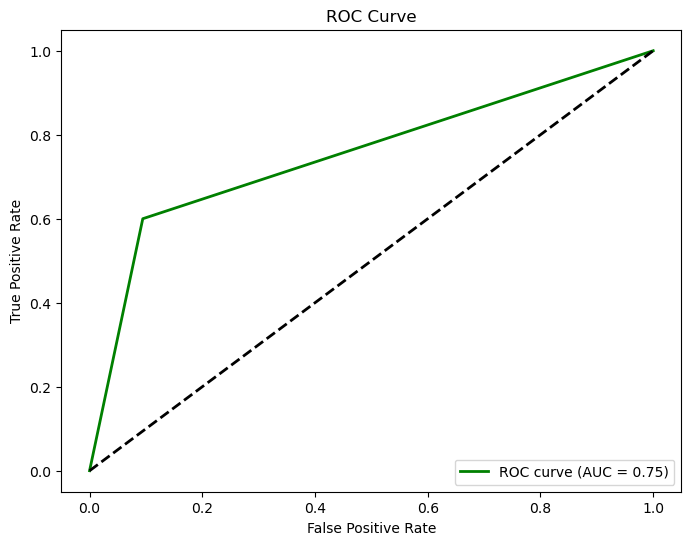

In [35]:
fpr,tpr,a = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model 2 - Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
#Run1

gs = GridSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ["gini","entropy"],
                     max_depth = [5,10,15,20],
                     min_samples_leaf=[4,6,8,10]),
                  scoring='recall',
                 cv=5)

In [38]:
gs.fit(x_train2,y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [4, 6, 8, 10]},
             scoring='recall')

In [39]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4}

In [40]:
#Run2

gs = GridSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ["entropy"],
                     max_depth = [20,25,30,35,40],
                     min_samples_leaf=[2,3,4]),
                  scoring='recall',
                 cv=5)

In [41]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 3}

In [42]:
#Run3

gs = GridSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ["entropy"],
                     max_depth = [34,35,36],
                     min_samples_leaf=[3]),
                  scoring='recall',
                 cv=5)

In [43]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 3}

In [44]:
model2 = gs.best_estimator_
model2.fit(x_train2 , y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=3)

In [45]:
y_pred2= model2.predict(x_test)

In [46]:
acc_score2 = accuracy_score(y_test,y_pred2)
precision_score2 = precision_score(y_test,y_pred2)
recall_score2 = recall_score(y_test,y_pred2)
f1_score2 = f1_score(y_test,y_pred2)
confusion_matrix2 = confusion_matrix(y_test,y_pred2)

In [47]:
new_row = {'acc': acc_score2, 'precision': precision_score2, 'recall': recall_score2, 'f1': f1_score2}
Eval_Matrix = Eval_Matrix.append(new_row, ignore_index=True)

In [48]:
Eval_Matrix

,acc,precision,recall,f1
0,0.903533,0.041667,0.60,0.077922
1,0.991304,0.379310,0.44,0.407407


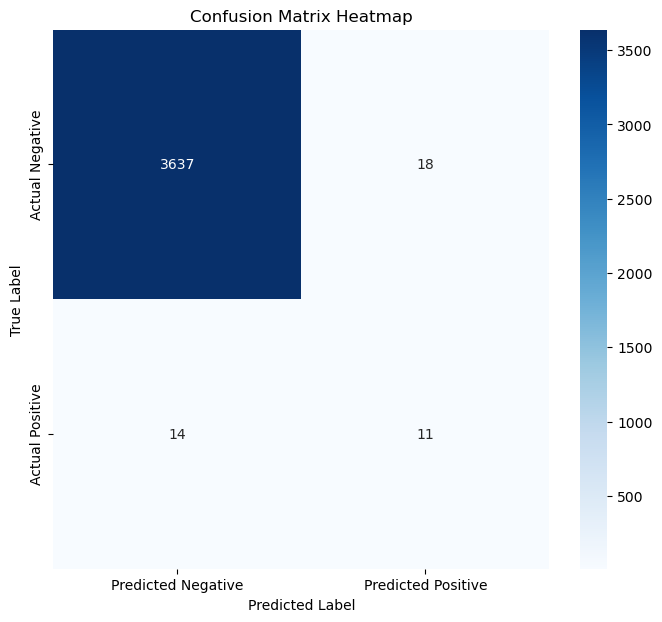

In [49]:
conf_df = pd.DataFrame(confusion_matrix2, index=['Actual Negative', 'Actual Positive'],
                       columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 7))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

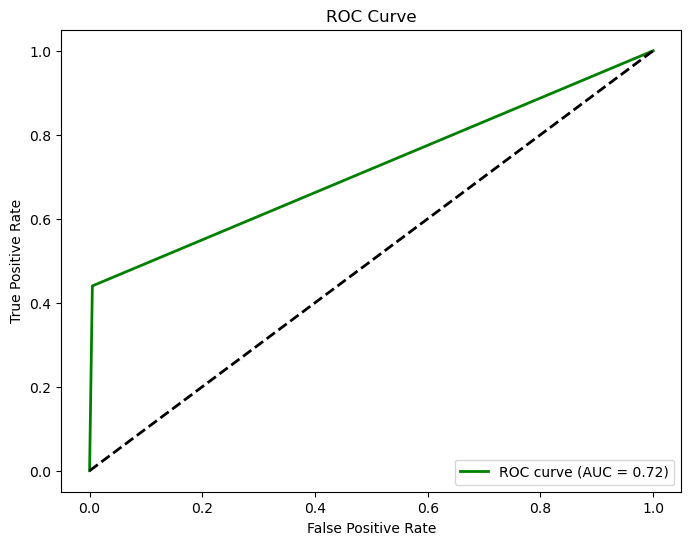

In [50]:
fpr,tpr,a = roc_curve(y_test, y_pred2)

roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Model 3 - Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
#Run1

gs = GridSearchCV(RandomForestClassifier(),
                 dict(n_estimators = [20,30,40],
                     max_depth = [5,10],
                     min_samples_leaf=[4,6,8,10]),
                  scoring='recall',
                 cv=5)

In [53]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 20}

In [55]:
#Run2

gs = GridSearchCV(RandomForestClassifier(),
                 dict(n_estimators = [15,20,25],
                     max_depth = [10,12,14,16,18],
                     min_samples_leaf=[5,6,7]),
                  scoring='recall',
                 cv=5)

In [56]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'max_depth': 14, 'min_samples_leaf': 7, 'n_estimators': 15}

In [57]:
#Run3
gs = GridSearchCV(RandomForestClassifier(),
                 dict(n_estimators = [10,12,14,16],
                     max_depth = [14],
                     min_samples_leaf=[7]),
                  scoring='recall',
                 cv=5)

In [58]:
gs.fit(x_train2,y_train2)
gs.best_params_

{'max_depth': 14, 'min_samples_leaf': 7, 'n_estimators': 16}

In [59]:
model3 = gs.best_estimator_
model3.fit(x_train2 , y_train2)

RandomForestClassifier(max_depth=14, min_samples_leaf=7, n_estimators=16)

In [60]:
y_pred3= model3.predict(x_test)

In [61]:
acc_score3 = accuracy_score(y_test,y_pred3)
precision_score3 = precision_score(y_test,y_pred3)
recall_score3 = recall_score(y_test,y_pred3)
f1_score3 = f1_score(y_test,y_pred3)
confusion_matrix3 = confusion_matrix(y_test,y_pred3)

In [62]:
new_row = {'acc': acc_score3, 'precision': precision_score3, 'recall': recall_score3, 'f1': f1_score3}
Eval_Matrix = Eval_Matrix.append(new_row, ignore_index=True)

In [63]:
Eval_Matrix

,acc,precision,recall,f1
0,0.903533,0.041667,0.60,0.077922
1,0.991304,0.379310,0.44,0.407407
2,0.993750,0.545455,0.48,0.510638


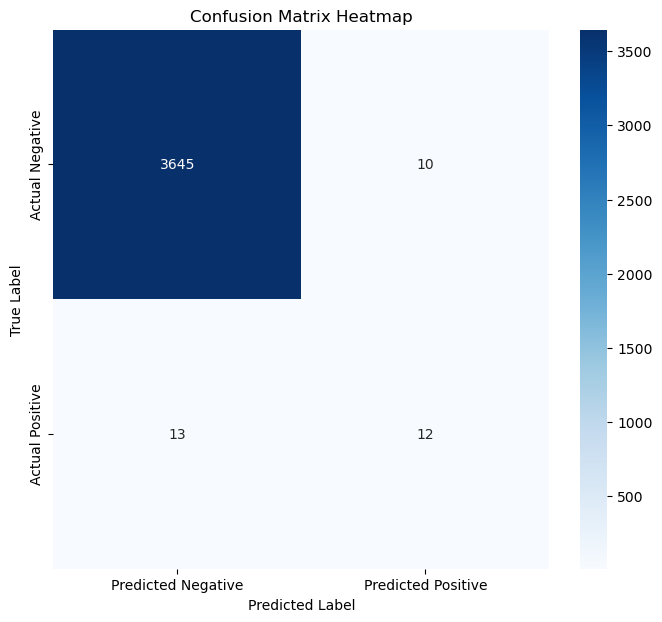

In [64]:
conf_df = pd.DataFrame(confusion_matrix3, index=['Actual Negative', 'Actual Positive'],
                       columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(8, 7))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

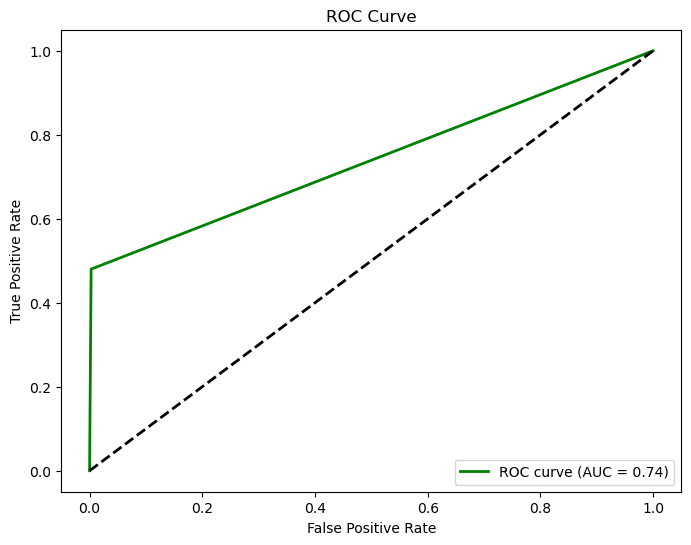

In [65]:
fpr,tpr,a = roc_curve(y_test, y_pred3)

roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

highlighted_Eval = Eval_Matrix.style.apply(highlight_max)

highlighted_Eval

,acc,precision,recall,f1
0,0.903533,0.041667,0.600000,0.077922
1,0.991304,0.379310,0.440000,0.407407
2,0.993750,0.545455,0.480000,0.510638


#### We have a choice between our logistic regression model and our Random Forest Model.
1. Our Logistic Regression Model has the best recall score of 0.6 and a good accuracy score of 90%.
2. Our Random Forest Model has a slightly worse recall score of 0.48 but a much higher accuracy of 99.4% , 55% precision and 52% f1.

Conclusion: We will pick our Random Forest Model